In [22]:
import pandas as pd
import numpy as np

In [23]:
import sklearn.feature_extraction
sklearn.__version__

'0.19.1'

In [24]:
%matplotlib inline
from matplotlib import pylab
from pylab import *

In [25]:
# Version 0.12.0 of Pandas has a DeprecationWarning about Height blah that I'm ignoring
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [26]:
# Set default pylab stuff# Set de 
pylab.rcParams['figure.figsize'] = (5.0, 4.0)
pylab.rcParams['axes.grid'] = True

In [27]:
train = pd.read_csv('dgcorrect1/bin/pre/testing2.csv')

In [28]:
train

,uri,class
0,9248c26a0be23c01.net,dga
1,ytubeukhylbhqwsbmbifmiblmbx.info,dga
2,zidnwnki.org,dga
3,qbfnof.dyndns.org,dga
4,1uzfyzf5xo7ux1y4czth1pfq856.net,dga
5,occ-0-1715-2218.1.nflxso.net,legit
6,iqmkwmoiiwiggoqa.org,dga
7,niceteentube.com,legit
8,lyqjbcrfabiguxyn1.com,dga
9,xvtu99hboduyl.com,dga


In [29]:
# Okay for this exercise we need the 2LD and nothing else
import tldextract

def domain_extract(uri):
    ext = tldextract.extract(uri)
    if (not ext.suffix):
        return np.nan
    else:
        return ext.domain

train['domain'] = [ domain_extract(uri) for uri in train['uri']]

In [30]:

# Add a length field for the domain# Add a  
train['length'] = [len(x) for x in train['domain'].astype('str')]

# Okay since we're trying to detect dynamically generated domains and short
# domains (length <=6) are crazy random even for 'legit' domains we're going
# to punt on short domains (perhaps just white/black list for short domains?)
train = train[train['length'] > 6]

In [31]:
train

,uri,class,domain,length
0,9248c26a0be23c01.net,dga,9248c26a0be23c01,16
1,ytubeukhylbhqwsbmbifmiblmbx.info,dga,ytubeukhylbhqwsbmbifmiblmbx,27
2,zidnwnki.org,dga,zidnwnki,8
4,1uzfyzf5xo7ux1y4czth1pfq856.net,dga,1uzfyzf5xo7ux1y4czth1pfq856,27
6,iqmkwmoiiwiggoqa.org,dga,iqmkwmoiiwiggoqa,16
7,niceteentube.com,legit,niceteentube,12
8,lyqjbcrfabiguxyn1.com,dga,lyqjbcrfabiguxyn1,17
9,xvtu99hboduyl.com,dga,xvtu99hboduyl,13
10,punwcgvweffyhpuxg.im,dga,punwcgvweffyhpuxg,17
11,africavenue.com,legit,africavenue,11


In [32]:
# Grabbed this from Rosetta Code (rosettacode.org)
import math
from collections import Counter
 
def entropy(s):
    p, lns = Counter(s), float(len(s))
    return -sum( count/lns * math.log(count/lns, 2) for count in p.values())

In [33]:
# Add a entropy field for the domain
train['entropy'] = [entropy(x) for x in train['domain']]

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0,0.5,u'Domain Length')

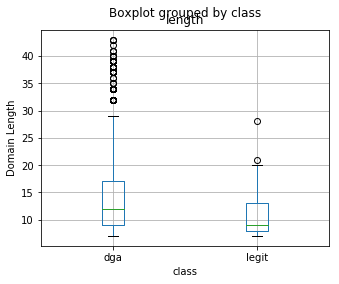

In [34]:
# Boxplots show you the distribution of the data (spread).
# http://en.wikipedia.org/wiki/Box_plot

# Plot the length and entropy of domains
train.boxplot('length','class')
pylab.ylabel('Domain Length')

Text(0,0.5,u'Domain Entropy')

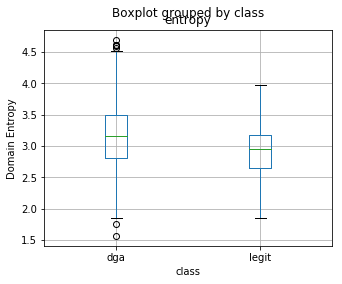

In [35]:
train.boxplot('entropy','class')
pylab.ylabel('Domain Entropy')

Text(0,0.5,u'Domain Entropy')

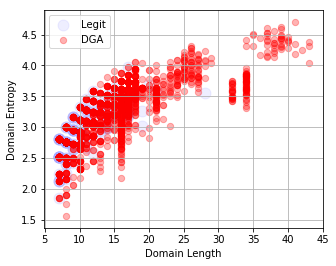

In [36]:
# Lets plot some stuff!
# Here we want to see whether our new 'alexa_grams' feature can help us differentiate between Legit/DGA
cond = train['class'] == 'dga'
dga = train[cond]
legit = train[~cond]
plt.scatter(legit['length'], legit['entropy'],  s=120, c='#aaaaff', label='Legit', alpha=.2)
plt.scatter(dga['length'], dga['entropy'], s=40, c='r', label='DGA', alpha=.3)
plt.legend()
pylab.xlabel('Domain Length')
pylab.ylabel('Domain Entropy')

In [37]:

# Well our Mom told us we were still cool.. so with that encouragement we're# Well o 
# going to compute NGrams for every Alexa domain and see if we can use the
# NGrams to help us better differentiate and mark DGA domains...

# Scikit learn has a nice NGram generator that can generate either char NGrams or word NGrams (we're using char).
# Parameters: 
#       - ngram_range=(3,5)  # Give me all ngrams of length 3, 4, and 5
#       - min_df=1e-4        # Minimumum document frequency. At 1e-4 we're saying give us NGrams that 
#                            # happen in at least .1% of the domains (so for 100k... at least 100 domains)
alexa_vc = sklearn.feature_extraction.text.CountVectorizer(analyzer='char', ngram_range=(3,5), min_df=1e-4, max_df=1.0)

In [38]:
# I'm SURE there's a better way to store all the counts but not sure...
# At least the min_df parameters has already done some thresholding
counts_matrix = alexa_vc.fit_transform(train['domain'])
alexa_counts = np.log10(counts_matrix.sum(axis=0).getA1())
ngrams_list = alexa_vc.get_feature_names()

In [39]:
# For fun sort it and show it
import operator
_sorted_ngrams = sorted(zip(ngrams_list, alexa_counts), key=operator.itemgetter(1), reverse=True)
print 'Legitimate NGrams: %d' % len(_sorted_ngrams)
for ngram, count in _sorted_ngrams[:10]:
    print ngram, count

Legitimate NGrams: 60152
ate 1.77815125038
ber 1.77085201164
mji 1.76342799356
ist 1.75587485567
ike 1.74036268949
ynu 1.74036268949
bac 1.73239375982
ced 1.73239375982
mbe 1.73239375982
mber 1.73239375982


In [40]:
train['alexa_grams']= alexa_counts * alexa_vc.transform(train['domain']).T 

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0,0.5,u'Legitimate NGram Matches')

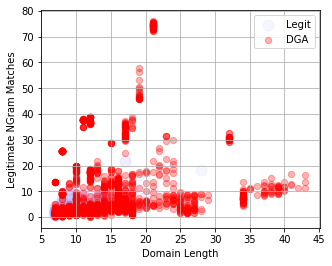

In [41]:
# Lets plot some stuff!
# Here we want to see whether our new 'alexa_grams' feature can help us differentiate between Legit/DGA
cond = train['class'] == 'dga'
dga = train[cond]
legit = train[~cond]
plt.scatter(legit['length'], legit['alexa_grams'], s=120, c='#aaaaff', label='Legit', alpha=.1)
plt.scatter(dga['length'], dga['alexa_grams'], s=40, c='r', label='DGA', alpha=.3)
plt.legend()
pylab.xlabel('Domain Length')
pylab.ylabel('Legitimate NGram Matches')

Text(0,0.5,u'Legitimate Gram Matches')

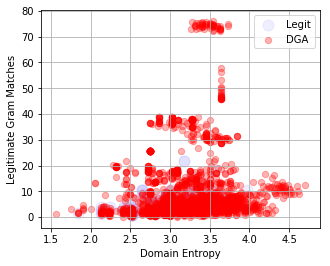

In [42]:
# Lets plot some stuff!
# Here we want to see whether our new 'alexa_grams' feature can help us differentiate between Legit/DGA
cond = train['class'] == 'dga'
dga = train[cond]
legit = train[~cond]
plt.scatter(legit['entropy'], legit['alexa_grams'],  s=120, c='#aaaaff', label='Legit', alpha=.2)
plt.scatter(dga['entropy'], dga['alexa_grams'], s=40, c='r', label='DGA', alpha=.3)
plt.legend()
pylab.xlabel('Domain Entropy')
pylab.ylabel('Legitimate Gram Matches')